In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('../全部数据/order_train1.csv', encoding='gbk')
df.drop_duplicates(inplace=True)  # 去重
df.to_csv('order_train2.csv')

#  （1）产品的不同价格对需求量的影响

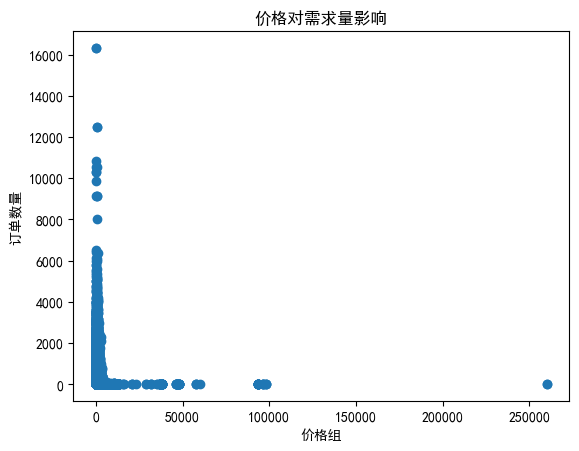

In [5]:
df = pd.read_csv('order_train2.csv', usecols=['item_price', 'ord_qty'], encoding='gbk')
#散点图  1_1
plt.scatter(df['item_price'], df['ord_qty'])
plt.title('价格对需求量影响')
plt.xlabel('价格组')
plt.ylabel('订单数量')
plt.show()

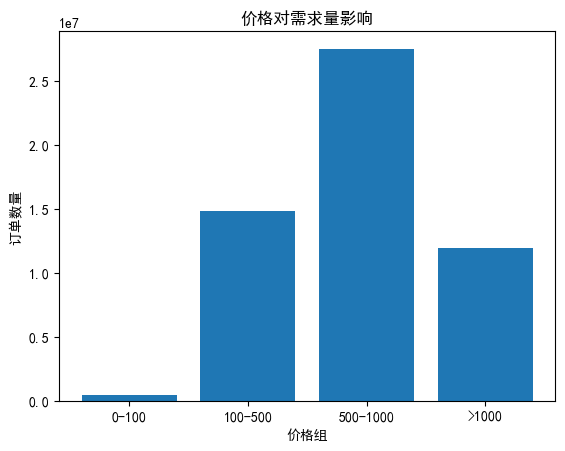

In [7]:
# 柱状图，价格分区  1_2
bins = [0, 100, 500, 1000, df['item_price'].max()]
labels = ['0-100', '100-500', '500-1000', '>1000']
df['price_group'] = pd.cut(df['item_price'], bins=bins, labels=labels)  # 构造价格区间列
grouped = df.groupby('price_group')['ord_qty'].sum()  # 按照价格区间分组并统计需求量
plt.bar(grouped.index, grouped.values)
plt.title('价格对需求量影响')
plt.xlabel('价格组')
plt.ylabel('订单数量')
plt.show()

In [8]:
grouped

price_group
0-100         499167
100-500     14852112
500-1000    27501627
>1000       11917406
Name: ord_qty, dtype: int64

# （2） 产品所在区域对需求量的影响，以及不同区域的产品需求量有何特性

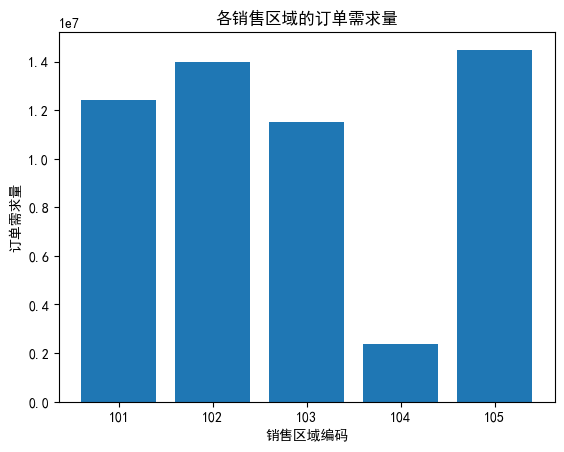

In [9]:
# 不同价格区间的需求量情况 2_1
df = pd.read_csv('order_train2.csv', usecols=['sales_region_code', 'ord_qty'], encoding='gbk')
grouped = df.groupby('sales_region_code')['ord_qty'].sum()
plt.bar(grouped.index, grouped.values)
plt.xlabel('销售区域编码')
plt.ylabel('订单需求量')
plt.title('各销售区域的订单需求量')
plt.show()

In [10]:
grouped

sales_region_code
101    12400949
102    13966622
103    11519878
104     2387342
105    14495521
Name: ord_qty, dtype: int64

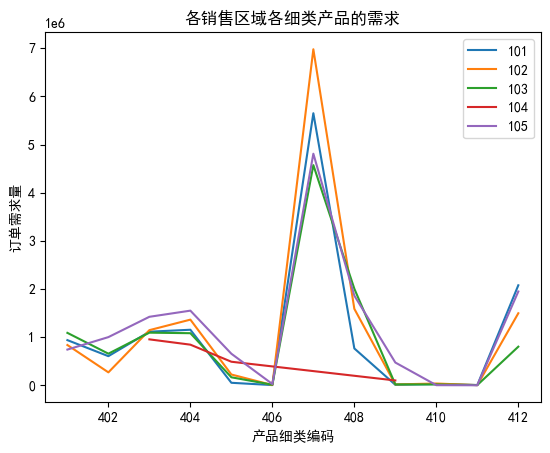

In [11]:
# 每个区域各细类进行产品需求分析 2_2
df = pd.read_csv('order_train2.csv', usecols=['sales_region_code', 'second_cate_code', 'ord_qty'], encoding='gbk')
grouped = df.groupby(['sales_region_code', 'second_cate_code'])['ord_qty'].sum().reset_index()
regions = grouped['sales_region_code'].unique()  # 所有销售区域编码
for region in regions:
    region_data = grouped[grouped['sales_region_code'] == region]
    plt.plot(region_data['second_cate_code'], region_data['ord_qty'], label=region)
plt.legend()
plt.title('各销售区域各细类产品的需求')
plt.xlabel('产品细类编码')
plt.ylabel('订单需求量')
plt.show()

In [14]:
grouped

,sales_region_code,second_cate_code,ord_qty
0,101,401,938210
1,101,402,604817
2,101,403,1113233
3,101,404,1153908
4,101,405,51961
5,101,406,4300
6,101,407,5651908
7,101,408,764899
8,101,409,10281
9,101,410,24779


# （3） 不同销售方式（线上和线下）的产品需求量的特性

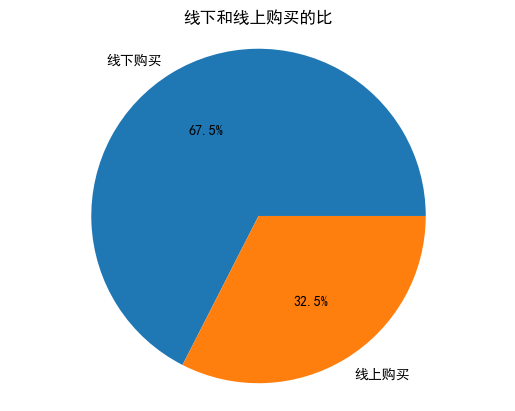

In [16]:
#  饼状图-线上和线下销售比  3_1
df = pd.read_csv('order_train2.csv', usecols=['sales_chan_name', 'ord_qty'])
grouped = df.groupby('sales_chan_name')['ord_qty'].sum()
plt.pie(grouped.values, labels=['线下购买', '线上购买'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('线下和线上购买的比')
plt.show()

In [17]:
grouped

sales_chan_name
offline    36966407
online     17803905
Name: ord_qty, dtype: int64

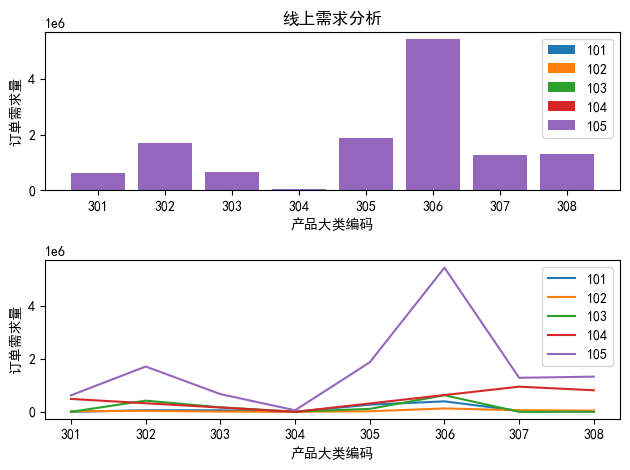

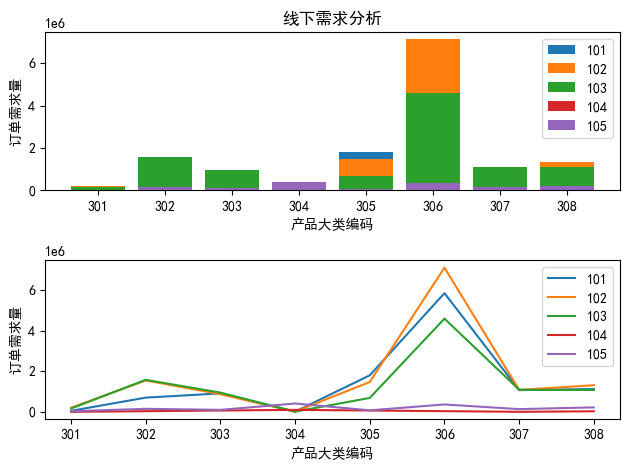

In [24]:
#  线上和线下分别与大类编码分析  3_2_1 3_2_2
df = pd.read_csv('order_train2.csv', usecols=['sales_chan_name', 'sales_region_code', 'first_cate_code', 'second_cate_code', 'ord_qty'])
online_data = df[df['sales_chan_name'] == 'online']
online_grouped = online_data.groupby(['sales_region_code', 'first_cate_code'])['ord_qty'].sum().reset_index()
offline_data = df[df['sales_chan_name'] == 'offline']
offline_grouped = offline_data.groupby(['sales_region_code', 'first_cate_code'])['ord_qty'].sum().reset_index()
# 线上需求量柱状图
plt.subplot(2, 1, 1)
regions = online_grouped['sales_region_code'].unique()
for region in regions:
    region_data = online_grouped[online_grouped['sales_region_code'] == region]
    plt.bar(region_data['first_cate_code'], region_data['ord_qty'], label=region)
plt.legend()
plt.xlabel('产品大类编码')
plt.ylabel('订单需求量')
plt.title('线上需求分析')
# 线上需求量折线图
plt.subplot(2, 1, 2)
regions = online_grouped['sales_region_code'].unique()
for region in regions:
    region_data = online_grouped[online_grouped['sales_region_code'] == region]
    plt.plot(region_data['first_cate_code'], region_data['ord_qty'], label=region)
plt.legend()
plt.xlabel('产品大类编码')
plt.ylabel('订单需求量')
# plt.title('线上需求分析')
plt.tight_layout()
plt.show()
# 线下需求量柱状图
plt.subplot(2, 1, 1)
regions = offline_grouped['sales_region_code'].unique()
for region in regions:
    region_data = offline_grouped[offline_grouped['sales_region_code'] == region]
    plt.bar(region_data['first_cate_code'], region_data['ord_qty'], label=region)
plt.legend()
plt.xlabel('产品大类编码')
plt.ylabel('订单需求量')
plt.title('线下需求分析')
# 线下需求量折线图
plt.subplot(2, 1, 2)
regions = offline_grouped['sales_region_code'].unique()
for region in regions:
    region_data = offline_grouped[offline_grouped['sales_region_code'] == region]
    plt.plot(region_data['first_cate_code'], region_data['ord_qty'], label=region)
plt.legend()
plt.xlabel('产品大类编码')
plt.ylabel('订单需求量')
# plt.title('线上需求分析')
plt.tight_layout()
plt.show()

In [23]:
online_grouped

,sales_region_code,first_cate_code,ord_qty
0,101,301,1292
1,101,302,61612
2,101,303,59911
3,101,304,327
4,101,305,272873
5,101,306,396556
6,101,307,40871
7,101,308,26577
8,102,301,24552
9,102,302,35691


In [25]:
offline_grouped

,sales_region_code,first_cate_code,ord_qty
0,101,301,50669
1,101,302,703287
2,101,303,912614
3,101,304,9954
4,101,305,1804544
5,101,306,5860169
6,101,307,1072362
7,101,308,1127331
8,102,301,199255
9,102,302,1552490


In [26]:
online_data

,sales_region_code,first_cate_code,second_cate_code,sales_chan_name,ord_qty
2,104,307,403,online,109
3,104,308,404,online,3
73,105,306,402,online,102
74,105,306,407,online,508
196,104,307,403,online,86
...,...,...,...,...,...
597370,102,302,408,online,76
597371,102,306,407,online,56
597372,102,306,407,online,13
597373,102,306,407,online,24


In [27]:
offline_data

,sales_region_code,first_cate_code,second_cate_code,sales_chan_name,ord_qty
0,104,307,403,offline,19
1,104,301,405,offline,12
4,104,307,403,offline,3
5,104,308,404,offline,14
6,104,308,404,offline,17
...,...,...,...,...,...
597377,102,302,408,offline,59
597378,102,302,408,offline,502
597379,102,302,408,offline,106
597380,102,302,408,offline,187


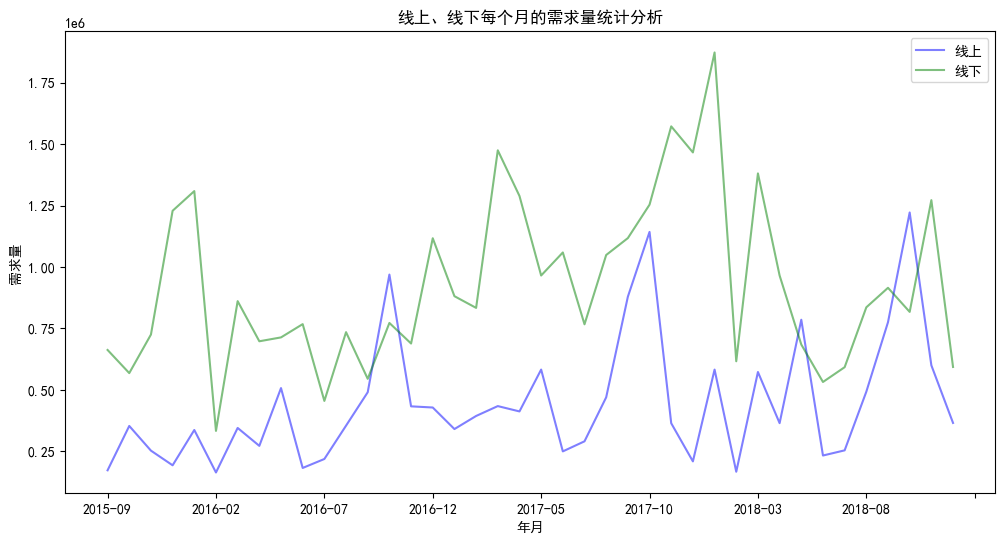

In [28]:
#  线上/线下每月需求，折线图  3_3
fig, ax = plt.subplots(figsize=(12, 6))
df = pd.read_csv('order_train2.csv', encoding='gbk')
# 将订单日期转换为日期类型，并提取年份和月份
df['order_date'] = pd.to_datetime(df['order_date'])
df['year_month'] = df['order_date'].dt.strftime('%Y-%m')
# 分别统计线上、线下每个月的需求量
online_monthly_demand = df[df['sales_chan_name'] == 'online'].groupby('year_month')['ord_qty'].sum().reset_index()
offline_monthly_demand = df[df['sales_chan_name'] == 'offline'].groupby('year_month')['ord_qty'].sum().reset_index()
# 线上需求量折线图
online_monthly_demand.plot(x='year_month', y='ord_qty', kind='line', ax=ax, color='blue', alpha=0.5)
# 线下需求量折线图
offline_monthly_demand.plot(x='year_month', y='ord_qty', kind='line', ax=ax, color='green', alpha=0.5)
# 设置图例、标题等
ax.legend(['线上', '线下'])
ax.set_title('线上、线下每个月的需求量统计分析')
ax.set_xlabel('年月')
ax.set_ylabel('需求量')
plt.show()

In [29]:
online_monthly_demand

,year_month,ord_qty
0,2015-09,170968
1,2015-10,351722
2,2015-11,251148
3,2015-12,191343
4,2016-01,335283
5,2016-02,162058
6,2016-03,343639
7,2016-04,270581
8,2016-05,506086
9,2016-06,180533


In [30]:
offline_monthly_demand

,year_month,ord_qty
0,2015-09,661458
1,2015-10,567152
2,2015-11,724244
3,2015-12,1228834
4,2016-01,1309031
5,2016-02,331611
6,2016-03,860433
7,2016-04,696877
8,2016-05,712680
9,2016-06,766812


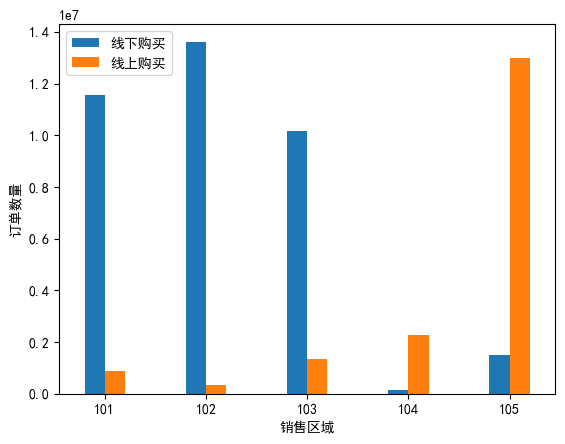

In [31]:
# 购买方式和销售区域的关系  3_4
df = pd.read_csv('order_train2.csv', encoding='gbk')
grouped = df.groupby(['sales_region_code', 'sales_chan_name'])['ord_qty'].sum().unstack()
# 绘制柱状图
ax = grouped.plot(kind='bar', width=0.4)
# 设置x轴和y轴标签
ax.set_xlabel('销售区域')
ax.set_ylabel('订单数量')
ax.set_xticklabels(grouped.index, rotation=0)
plt.legend(['线下购买','线上购买'])
# 显示图形
plt.show()

In [32]:
grouped

sales_chan_name,offline,online
sales_region_code,,
101,11540930,860019
102,13630634,335988
103,10171185,1348693
104,131335,2256007
105,1492323,13003198


# （4） 不同品类之间的产品需求量有何不同点和共同点；

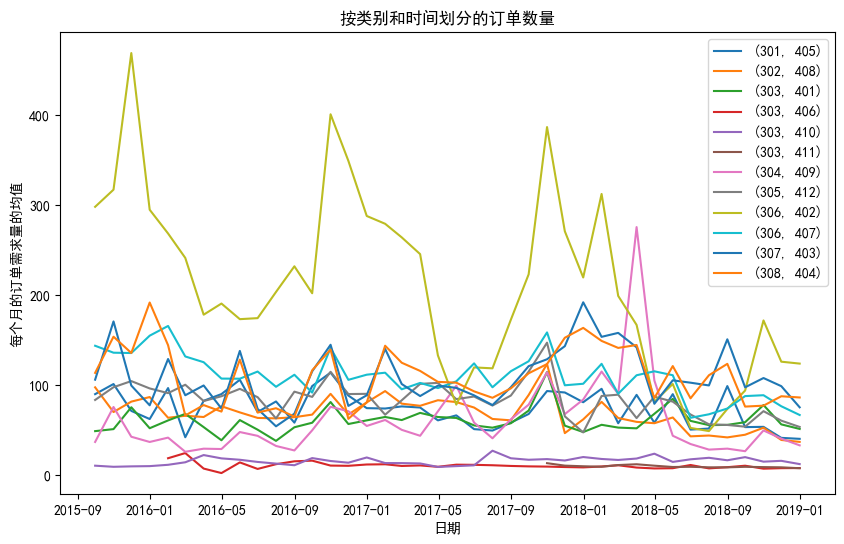

In [33]:
# 品类和时间的关系  4_1
# 读取csv文件
data = pd.read_csv('order_train2.csv')
# 将订单日期转换为时间戳
data['order_date'] = pd.to_datetime(data['order_date'])
# 按照品类和日期进行分组
grouped = data.groupby(['first_cate_code', 'second_cate_code', pd.Grouper(key='order_date', freq='M')])
# 计算每个品类在每个月的订单需求量的均值
result = grouped['ord_qty'].mean().reset_index()
# 计算每个品类在每个月的订单需求量
# result = grouped['ord_qty'].sum().reset_index()
# 绘制不同品类在不同时间段内的订单需求量变化趋势图
fig, ax = plt.subplots(figsize=(10, 6))
for name, group in result.groupby(['first_cate_code', 'second_cate_code']):
    ax.plot(group['order_date'], group['ord_qty'], label=name)
ax.legend(loc='best')
ax.set_xlabel('日期')
ax.set_ylabel('每个月的订单需求量的均值')
ax.set_title('按类别和时间划分的订单数量')
plt.show()

In [34]:
result

,first_cate_code,second_cate_code,order_date,ord_qty
0,301,405,2015-09-30,89.792135
1,301,405,2015-10-31,101.041916
2,301,405,2015-11-30,71.151899
3,301,405,2015-12-31,62.095960
4,301,405,2016-01-31,96.557229
...,...,...,...,...
446,308,404,2018-08-31,123.503289
447,308,404,2018-09-30,75.956066
448,308,404,2018-10-31,76.985595
449,308,404,2018-11-30,87.452334


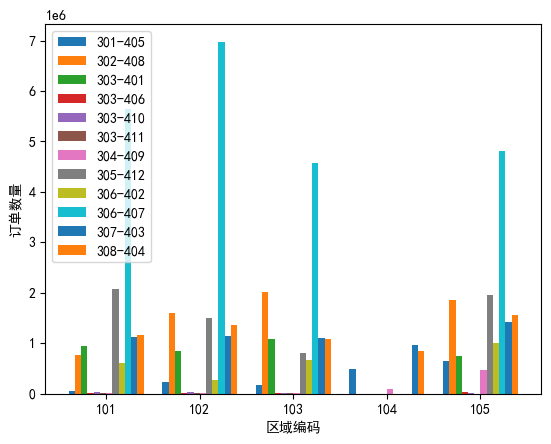

In [35]:
# 按区域编码和品类进行分组，并计算每个组的销量  4_2
df = pd.read_csv('order_train2.csv', encoding='gbk')
# 合并产品大类编码和产品细类编码，得到品类
df['category'] = df['first_cate_code'].astype(str) + '-' + df['second_cate_code'].astype(str)
df = df.rename(columns={'category': '品类编码'})
grouped = df.groupby(['sales_region_code', '品类编码'])['ord_qty'].sum().unstack()
# 绘制柱状图
ax = grouped.plot(kind='bar', width=0.8)
ax.legend(loc='upper left')
# 设置x轴和y轴标签
ax.set_xlabel('区域编码')
ax.set_ylabel('订单数量')
ax.set_xticklabels(grouped.index, rotation=0)
# 显示图形
plt.show()

In [36]:
grouped

品类编码,301-405,302-408,303-401,303-406,303-410,303-411,304-409,305-412,306-402,306-407,307-403,308-404
sales_region_code,,,,,,,,,,,,
101,51961.0,764899.0,938210.0,4300.0,24779.0,5236.0,10281.0,2077417.0,604817.0,5651908.0,1113233.0,1153908.0
102,223807.0,1588181.0,836489.0,5035.0,36670.0,3410.0,17876.0,1496401.0,268473.0,6980941.0,1145400.0,1363939.0
103,166150.0,2005697.0,1089103.0,11322.0,18011.0,4660.0,17335.0,801865.0,656579.0,4573910.0,1093165.0,1082081.0
104,489227.0,NaN,NaN,NaN,NaN,NaN,100259.0,NaN,NaN,NaN,953968.0,843888.0
105,655578.0,1862557.0,741842.0,26365.0,2194.0,399.0,472693.0,1948573.0,1000901.0,4810908.0,1422930.0,1550581.0


307-403
price_range
0-100          1443
100-500     3209325
500-1000    2382003
>1000        135925
Name: ord_qty, dtype: int64
301-405
price_range
0-100          571
100-500     573812
500-1000    721211
>1000       291129
Name: ord_qty, dtype: int64
308-404
price_range
0-100         27446
100-500      179520
500-1000    3246607
>1000       2540824
Name: ord_qty, dtype: int64
305-412
price_range
0-100        464315
100-500     4303451
500-1000     940695
>1000        615795
Name: ord_qty, dtype: int64
303-410
price_range
0-100         294
100-500     24230
500-1000     9152
>1000       47978
Name: ord_qty, dtype: int64
303-401
price_range
0-100          3404
100-500      443536
500-1000     928931
>1000       2229773
Name: ord_qty, dtype: int64
306-407
price_range
0-100            924
100-500      3380535
500-1000    15987540
>1000        2648668
Name: ord_qty, dtype: int64
302-408
price_range
0-100           115
100-500      211952
500-1000    3156410
>1000       2852857
Name: ord_qt

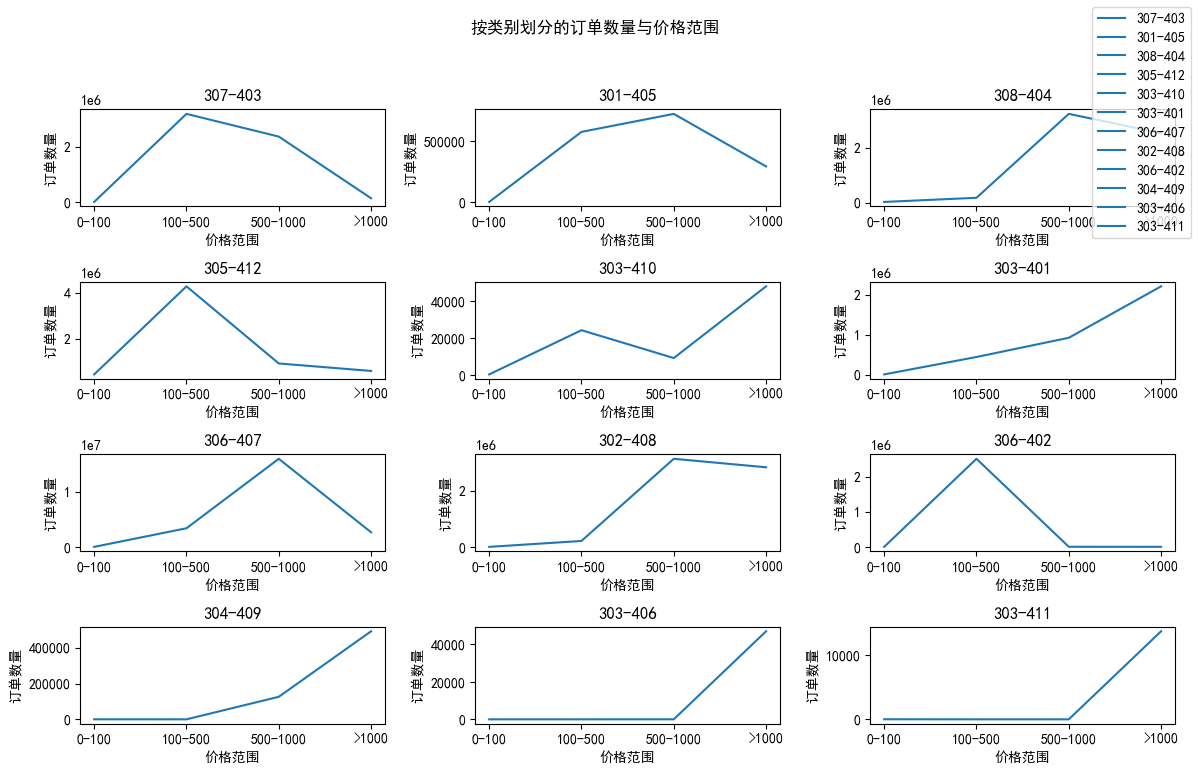

In [40]:
# 大类和价格的关系  4_3
# 读取CSV文件
data = pd.read_csv('order_train2.csv', encoding='gbk')
# 合并产品大类编码和产品细类编码，得到品类
data['category'] = data['first_cate_code'].astype(str) + '-' + data['second_cate_code'].astype(str)
# 将价格分为四个区间
bins = [0, 100, 500, 1000, data['item_price'].max()]
labels = ['0-100', '100-500', '500-1000', '>1000']
data['price_range'] = pd.cut(data['item_price'], bins=bins, labels=labels)
# 分组绘制子图
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))
categories = data['category'].unique()
for i, ax in enumerate(axes.flat):
    if i < len(categories):
        category = categories[i]
        sub_data = data[data['category'] == category]
        sub_data = sub_data.groupby('price_range')['ord_qty'].sum()
        sub_data.plot(ax=ax, kind='line', title=category)
        ax.set_xlabel('价格范围')
        ax.set_ylabel('订单数量')
        print(category,sub_data,sep='\n')
# 添加图例和标题
fig.legend(labels=categories, loc='upper right')
fig.suptitle('按类别划分的订单数量与价格范围')
# 调整子图布局
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# 显示图形
plt.show()

# （5） 不同时间段（例如月头、月中、月末等）产品需求量有何特性

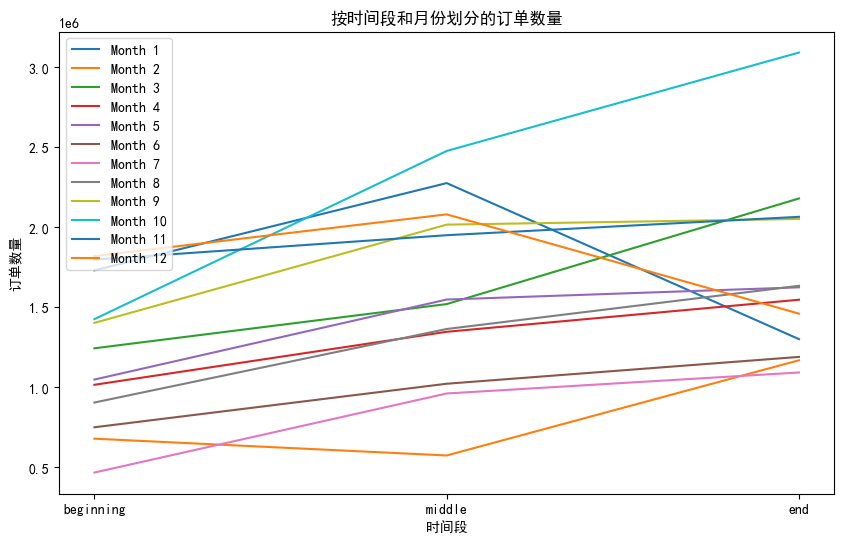

In [42]:
# 每个月的不同时间段的需求 5_1
# 读取csv文件
data = pd.read_csv('order_train2.csv', encoding='gbk')
# 将订单日期转换为日期类型，并提取月份
data['order_date'] = pd.to_datetime(data['order_date'])
data['month'] = data['order_date'].dt.month
# 按月份和时间段分组，计算需求量总和
data['time_period'] = pd.cut(data['order_date'].dt.day, bins=[1, 10, 20, 31], labels=['beginning', 'middle', 'end'])
grouped_data = data.groupby(['month', 'time_period'])['ord_qty'].sum().reset_index()
# 绘制折线图
fig, ax = plt.subplots(figsize=(10, 6))
for month in grouped_data['month'].unique():
    sub_data = grouped_data[grouped_data['month'] == month]
    ax.plot(sub_data['time_period'], sub_data['ord_qty'], label='Month {}'.format(month))
ax.set_xlabel('时间段')
ax.set_ylabel('订单数量')
ax.set_title('按时间段和月份划分的订单数量')
ax.legend()
# 显示图形
plt.show()

In [43]:
grouped_data

,month,time_period,ord_qty
0,1,beginning,1730637
1,1,middle,2275513
2,1,end,1301118
3,2,beginning,679694
4,2,middle,574823
5,2,end,1169286
6,3,beginning,1243992
7,3,middle,1520109
8,3,end,2179610
9,4,beginning,1016150


2015
month        1   2   3   4   5   6   7   8       9       10      11      12
time_period                                                                
beginning     0   0   0   0   0   0   0   0  235860  192078  242532  434775
middle        0   0   0   0   0   0   0   0  362722  330115  399100  514499
end           0   0   0   0   0   0   0   0  233813  396681  330174  457512
2016
month            1       2       3       4       5       6       7       8   \
time_period                                                                   
beginning    493216   24022  287527  246149  280082  225272   99032  221438   
middle       612968  113685  379944  329661  436568  325111  267382  416867   
end          538130  328906  508002  356775  500182  369766  296352  439541   

month            9       10      11      12  
time_period                                  
beginning    282931  463314  374788  450903  
middle       394552  611527  365408  471006  
end          345762  630325  3

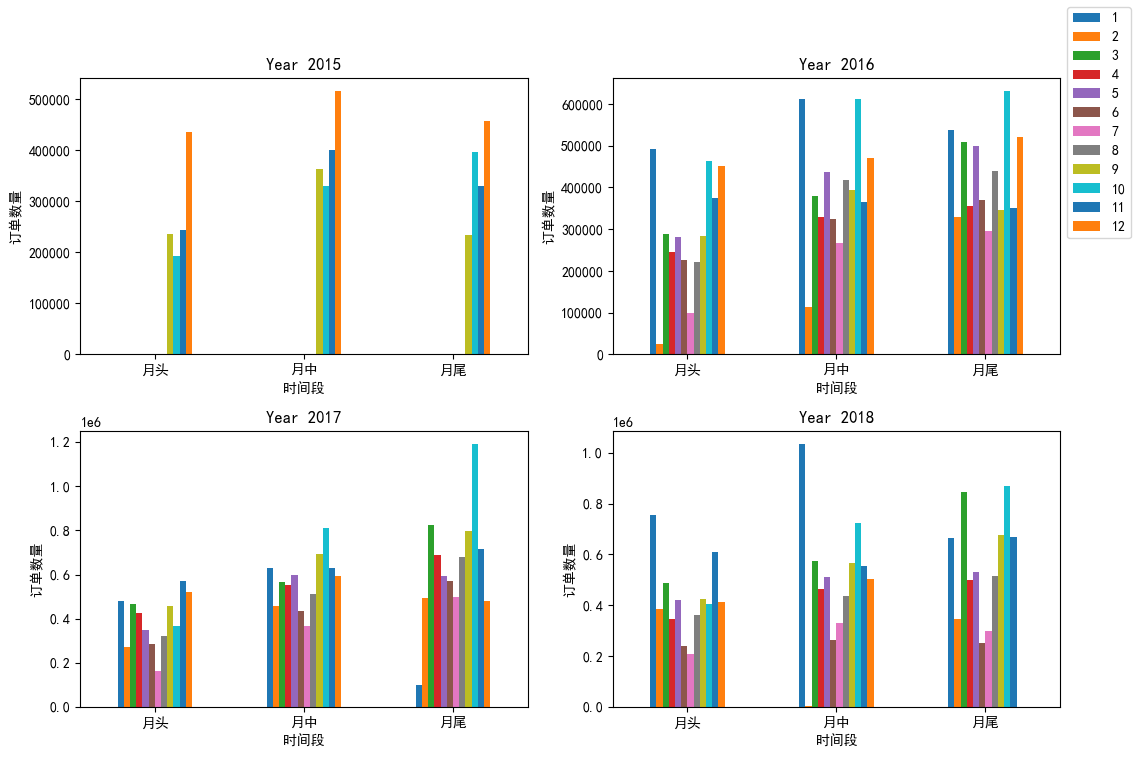

In [49]:
# 每年各月的需求  5_2
# 读取文件
data = pd.read_csv('order_train2.csv', encoding='gbk')
# 将订单日期转换为日期类型，并提取出年份、月份和时间段
data['order_date'] = pd.to_datetime(data['order_date'])
data['year'] = data['order_date'].dt.year
data['month'] = data['order_date'].dt.month
data['time_period'] = pd.cut(data['order_date'].dt.day, bins=[1, 10, 20, 31], labels=['beginning', 'middle', 'end'])
# 按照年份、月份和时间段分组，计算销量的总和
grouped_data = data.groupby(['year', 'month', 'time_period'])['ord_qty'].sum().reset_index()
# 绘制柱状图
years = grouped_data['year'].unique()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    if i < len(years):
        year = years[i]
        sub_data = grouped_data[grouped_data['year'] == year]
        sub_data = sub_data.pivot(index='time_period', columns='month', values='ord_qty')
        sub_data.plot(ax=ax, kind='bar', title='Year {}'.format(year))
        ax.set_xlabel('时间段')
        ax.set_ylabel('订单数量')
        ax.set_xticklabels(['月头', '月中', '月尾'], rotation=0)
        ax.legend().remove()
        print(year,sub_data, sep='\n')
# 添加图例
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
# 调整子图布局
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
# 显示图形
plt.show()

# （6） 节假日对产品需求量的影响

In [51]:
# 判断是否为节假日
def is_holiday(date):
    week_day = date.weekday() + 1  # 星期几，1表示星期一，7表示星期日
    if week_day in [6, 7]:  # 如果是周末
        return True
    elif date.month == 1 and date.day == 1:  # 如果是元旦
        return True
    elif date.month == 5 and date.day in [1, 2, 3]:  # 如果是劳动节
        return True
    elif date.month == 10 and date.day in [1, 2, 3, 4, 5, 6, 7]:  # 如果是国庆节
        return True
    else:
        return False

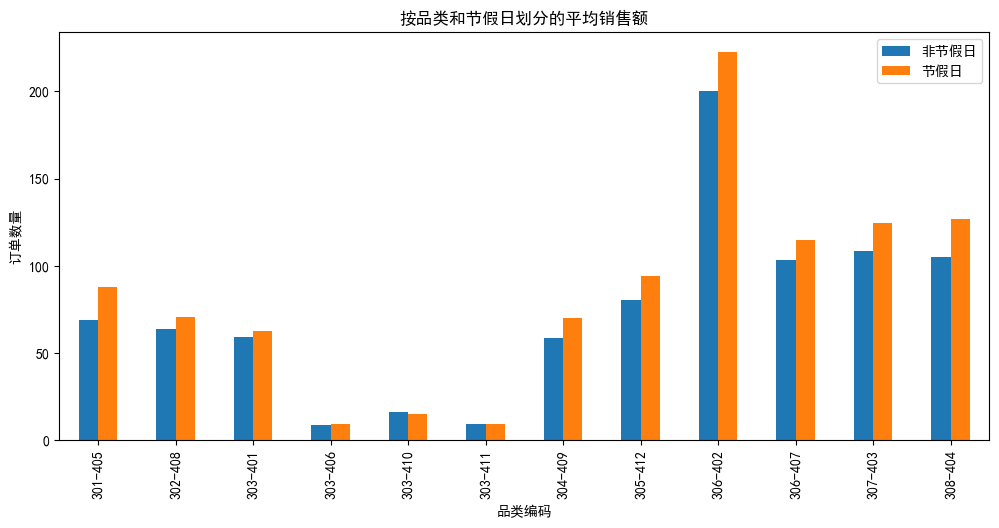

In [52]:
# 节假日和品类的关系  6_1
# 读取文件
data = pd.read_csv('order_train2.csv', encoding='gbk')
# 将订单日期转换为日期类型
data['order_date'] = pd.to_datetime(data['order_date'])
# 合并产品大类编码和产品细类编码，得到品类
data['category'] = data['first_cate_code'].astype(str) + '-' + data['second_cate_code'].astype(str)
data['is_holiday'] = data['order_date'].apply(is_holiday)
grouped = data.groupby(['category', 'is_holiday'])['ord_qty'].mean().unstack()
# 按照销售区域进行分组
grouped_by_region = grouped.groupby('category').mean()
# 绘制柱状图
fig, ax = plt.subplots(figsize=(12, 6))
grouped_by_region.plot(kind='bar', ax=ax)
ax.set_xlabel('品类编码')
ax.set_ylabel('订单数量')
ax.set_title('按品类和节假日划分的平均销售额')
fig.subplots_adjust(bottom=0.2)
plt.legend(['非节假日','节假日'])
plt.show()

In [53]:
grouped_by_region

is_holiday,False,True
category,,
301-405,68.789534,87.841915
302-408,63.873365,70.425533
303-401,59.007789,62.451492
303-406,8.930419,9.542429
303-410,16.285522,15.338897
303-411,9.528421,9.633540
304-409,58.867665,70.056764
305-412,80.388826,94.101432
306-402,200.261996,222.654285


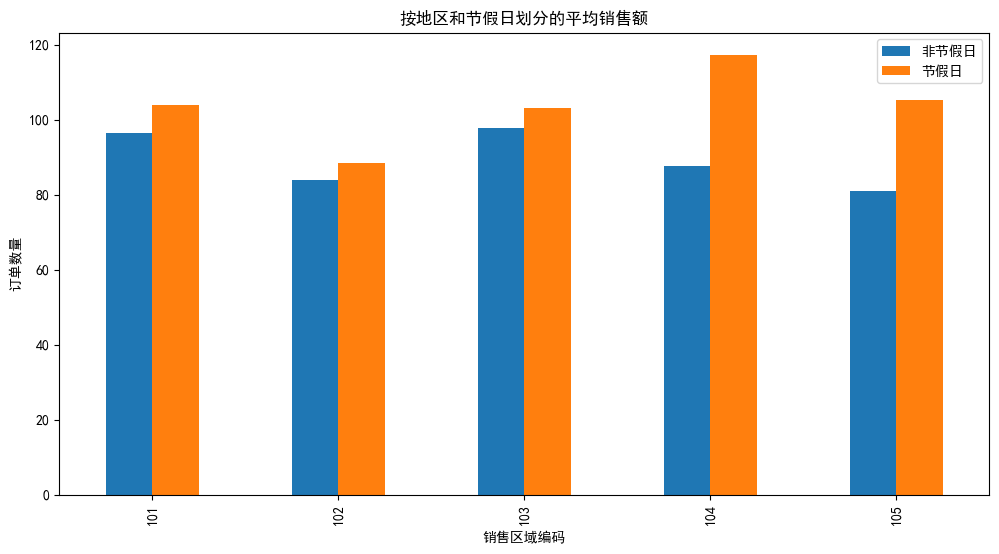

In [56]:
# 节假日与销售区域的关系 6_2
# 读取文件
df = pd.read_csv('order_train2.csv', encoding='gbk')
# 将订单日期转换为日期类型
df['order_date'] = pd.to_datetime(df['order_date'])
df['is_holiday'] = df['order_date'].apply(is_holiday)
grouped = df.groupby(['sales_region_code', 'is_holiday'])['ord_qty'].mean().unstack()
# 按照销售区域进行分组
grouped_by_region = grouped.groupby('sales_region_code').mean()
# 绘制柱状图
fig, ax = plt.subplots(figsize=(12, 6))
grouped_by_region.plot(kind='bar', ax=ax)
ax.set_xlabel('销售区域编码')
ax.set_ylabel('订单数量')
ax.set_title('按地区和节假日划分的平均销售额')
plt.legend(['非节假日','节假日'])
plt.show()

In [57]:
grouped_by_region

is_holiday,False,True
sales_region_code,,
101,96.502346,103.828482
102,83.999172,88.564663
103,97.714294,103.049544
104,87.624153,117.383625
105,80.895122,105.122959


# （7） 促销（如 618、双十一等）对产品需求量的影响

In [2]:
# 导入表，格式转换
df = pd.read_csv('order_train2.csv', encoding='gbk')
df['order_date'] = pd.to_datetime(df['order_date'])

# 不同促销时段销量  7_1
# 定义促销日期列表
promotions = {
    '618': ['2015-06-18', '2016-06-18', '2017-06-18', '2018-06-18'],
    '双十一': ['2015-11-11', '2016-11-11', '2017-11-11', '2018-11-11'],
    '双十二': ['2015-12-12', '2016-12-12', '2017-12-12', '2018-12-12'],
    '情人节': ['2015-02-14', '2016-02-14', '2017-02-14', '2018-02-14'],
    '中秋节': ['2015-09-27', '2016-09-15', '2017-09-05', '2018-09-24'],
    '母亲节': ['2015-05-10', '2016-05-08', '2017-05-14', '2018-05-13'],
    '父亲节': ['2015-06-21', '2016-06-19', '2017-06-18', '2018-06-17'],
    '元旦': ['2015-1-1', '2016-1-1', '2017-1-1', '2018-1-1'],
}



618促销数据：
   year     before     during      after
0  2015        NaN        NaN        NaN
1  2016  89.080072  73.409713  95.598463
2  2017  83.768545  93.239990  92.064183
3  2018  51.660645  58.552577  60.240214
双十一促销数据：
   year      before      during       after
0  2015  135.657929  152.035553  102.922977
1  2016   91.073791   89.073308   99.007053
2  2017  108.358058   87.917197  113.447488
3  2018   71.739261   61.199673   65.882667
双十二促销数据：
   year      before      during       after
0  2015  124.393357  115.294868  112.950974
1  2016  104.998172   98.564925   85.538088
2  2017  112.354662  123.507747   79.755615
3  2018   54.902498   61.549101   67.486804
情人节促销数据：
   year     before     during       after
0  2015        NaN        NaN         NaN
1  2016        NaN  94.962291  101.111585
2  2017  92.562462  86.868003  102.383651
3  2018  60.232777        NaN   86.709077
中秋节促销数据：
   year      before      during       after
0  2015   96.278475  138.379233  119.144063
1  2016  102

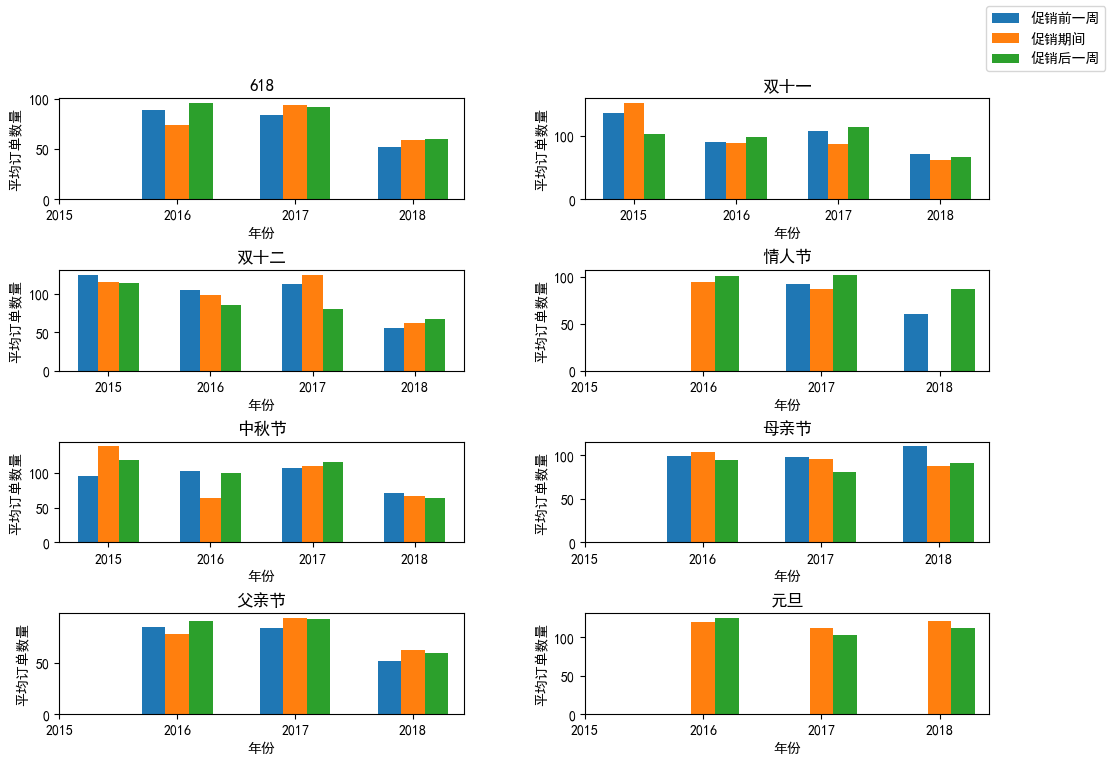

In [17]:
# 按年份分组
df['year'] = df['order_date'].dt.year

# 创建一个4x2的子图布局
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

# 分别处理每个促销活动
for i, promotion in enumerate(promotions):
    print(f'{promotion}促销数据：')
    # 获取促销日期列表
    promotion_dates = promotions[promotion]
    # 创建一个DataFrame，用于存储每个促销活动的销量数据
    df_promotion = pd.DataFrame(columns=['year', 'before', 'during', 'after'])
    # 分别处理每年的数据
    for year in range(2015, 2019):
        # 提取该年份的数据
        df_year = df[df['year'] == year]
        # 计算促销前、期间、后的平均销量
        before = df_year.loc[(df_year['order_date'] >= pd.to_datetime(promotion_dates[year-2015]) - pd.Timedelta(days=7)) & (df_year['order_date'] < pd.to_datetime(promotion_dates[year-2015])), 'ord_qty'].mean()
        during = df_year.loc[(df_year['order_date'] >= pd.to_datetime(promotion_dates[year-2015])) & (df_year['order_date'] <= pd.to_datetime(promotion_dates[year-2015]) + pd.Timedelta(days=7)), 'ord_qty'].mean()
        after = df_year.loc[(df_year['order_date'] > pd.to_datetime(promotion_dates[year-2015]) + pd.Timedelta(days=7)) & (df_year['order_date'] <= pd.to_datetime(promotion_dates[year-2015]) + pd.Timedelta(days=14)), 'ord_qty'].mean()
        # 将数据添加到DataFrame中
        df_promotion = pd.concat([df_promotion, pd.DataFrame({'year': year, 'before': before, 'during': during, 'after': after}, index=[0])], ignore_index=True)
    print(df_promotion,sep='\n')
    # 绘制柱状图
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.bar(df_promotion['year'] - 0.2, df_promotion['before'], width=0.2, label='促销前一周')
    ax.bar(df_promotion['year'], df_promotion['during'], width=0.2, label='促销期间')
    ax.bar(df_promotion['year'] + 0.2, df_promotion['after'], width=0.2, label='促销后一周')
    ax.set_xticks([2015, 2016, 2017, 2018])
    ax.set_xticklabels(['2015', '2016', '2017', '2018'])
    ax.set_xlabel('年份')
    ax.set_ylabel('平均订单数量')
    ax.set_title(promotion)
    ax.legend().remove()
# 添加图例
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
# 调整子图之间的间距
plt.subplots_adjust(wspace=0.3, hspace=0.7)
# 显示图形
plt.show()

618促销数据：
线上总销量：14029473
线下总销量：31723370
双十一促销数据：
线上总销量：16429315
线下总销量：34208226
双十二促销数据：
线上总销量：16802892
线下总销量：34331902
情人节促销数据：
线上总销量：12068305
线下总销量：28120527
中秋节促销数据：
线上总销量：15251424
线下总销量：33416261
母亲节促销数据：
线上总销量：13391662
线下总销量：30989468
父亲节促销数据：
线上总销量：14028108
线下总销量：31718597
元旦促销数据：
线上总销量：11404332
线下总销量：25894164


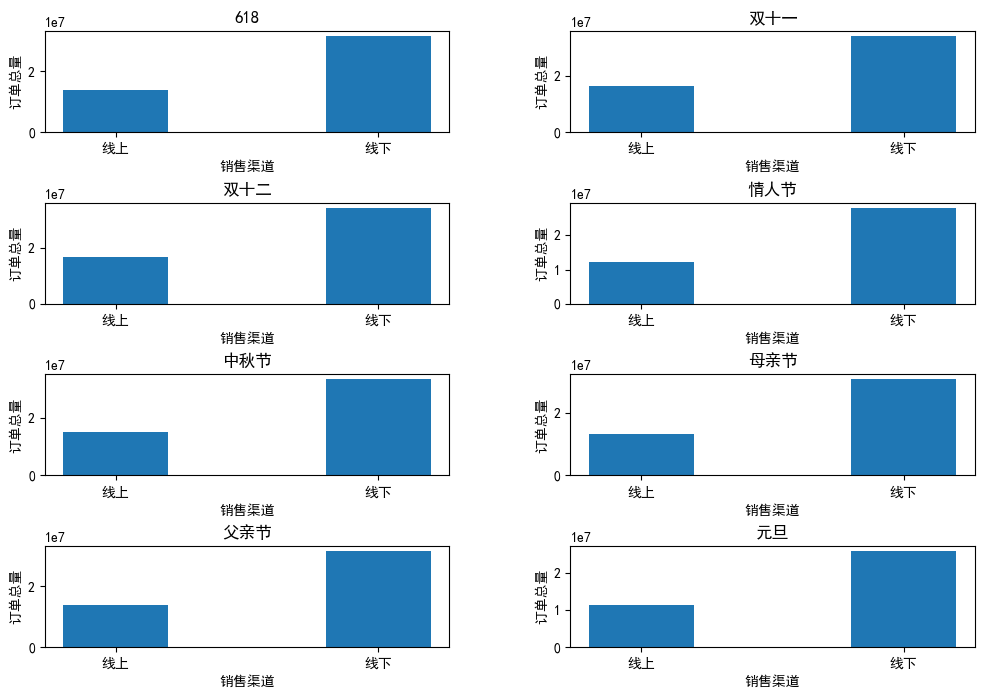

In [13]:
# 促销和订单方式的关系 7_2
# 创建一个4x2的子图布局
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

# 分别处理每个促销活动
for i, promotion in enumerate(promotions):
    print(f'{promotion}促销数据：')
    # 获取促销日期列表
    promotion_dates = promotions[promotion]
    # 计算线上和线下促销期间的销售总量
    sales_online = df.loc[(df['sales_chan_name'] == 'online') & (df['order_date'] >= pd.to_datetime(promotion_dates[0])) & (df['order_date'] <= pd.to_datetime(promotion_dates[-1])), 'ord_qty'].sum()
    sales_offline = df.loc[(df['sales_chan_name'] == 'offline') & (df['order_date'] >= pd.to_datetime(promotion_dates[0])) & (df['order_date'] <= pd.to_datetime(promotion_dates[-1])), 'ord_qty'].sum()
    print(f'线上总销量：{sales_online}',f'线下总销量：{sales_offline}',sep='\n')
    # 绘制柱状图
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.bar(['线上', '线下'], [sales_online, sales_offline], width=0.4)
    ax.set_xlabel('销售渠道')
    ax.set_ylabel('订单总量')
    ax.set_title(promotion)

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.3, hspace=0.7)
# 显示图形
plt.show()

618促销数据：
   year     average  promotion
0  2015  116.126267        NaN
1  2016   95.708178  73.409713
2  2017   99.086885  93.239990
3  2018   78.620965  58.552577
双十一促销数据：
   year     average   promotion
0  2015  116.126267  152.035553
1  2016   95.708178   89.073308
2  2017   99.086885   87.917197
3  2018   78.620965   61.199673
双十二促销数据：
   year     average   promotion
0  2015  116.126267  115.294868
1  2016   95.708178   98.564925
2  2017   99.086885  123.507747
3  2018   78.620965   61.549101
情人节促销数据：
   year     average  promotion
0  2015  116.126267        NaN
1  2016   95.708178  94.962291
2  2017   99.086885  86.868003
3  2018   78.620965        NaN
中秋节促销数据：
   year     average   promotion
0  2015  116.126267  138.379233
1  2016   95.708178   63.733207
2  2017   99.086885  109.932212
3  2018   78.620965   67.086280
母亲节促销数据：
   year     average   promotion
0  2015  116.126267         NaN
1  2016   95.708178  103.215201
2  2017   99.086885   95.154956
3  2018   78.620965   86.964

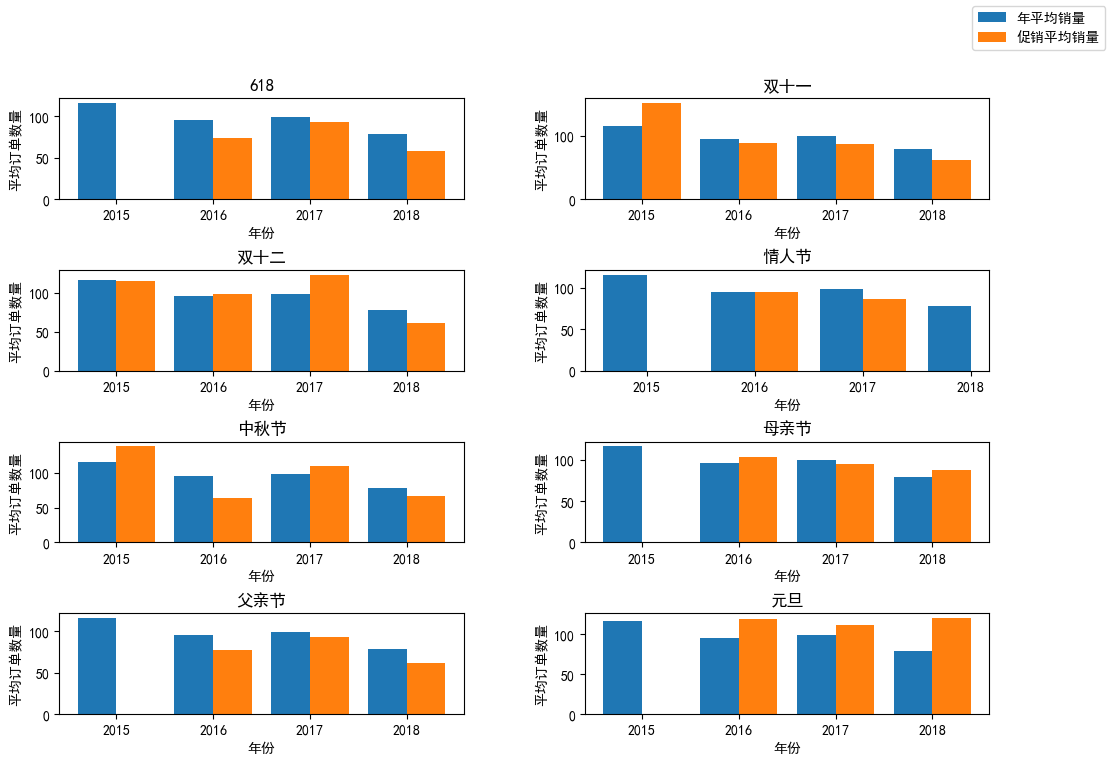

In [18]:
# 各促销日和平均销量关系  7_3
# 创建一个4x2的子图布局
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

# 分别处理每个促销活动
for i, promotion in enumerate(promotions):
    print(f'{promotion}促销数据：')
    # 获取促销日期列表
    promotion_dates = promotions[promotion]
    # 创建一个DataFrame，用于存储每个促销活动的销量数据
    df_promotion = pd.DataFrame(columns=['year', 'average', 'promotion'])
    # 分别处理每年的数据
    for year in range(2015, 2019):
        # 提取该年份的数据
        df_year = df[df['year'] == year]
        # 计算该年的平均销量
        average = df_year['ord_qty'].mean()
        # 计算促销期间的平均销量
        promotion_average = df_year.loc[(df_year['order_date'] >= pd.to_datetime(promotion_dates[year-2015])) & (df_year['order_date'] <= pd.to_datetime(promotion_dates[year-2015]) + pd.Timedelta(days=7)), 'ord_qty'].mean()
        # 将数据添加到DataFrame中
        df_promotion = pd.concat([df_promotion, pd.DataFrame({'year': year, 'average': average, 'promotion': promotion_average}, index=[0])], ignore_index=True)
    print(df_promotion)
    # 绘制柱状图
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.bar(df_promotion['year'] - 0.2, df_promotion['average'], width=0.4, label='年平均销量')
    ax.bar(df_promotion['year'] + 0.2, df_promotion['promotion'], width=0.4, label='促销平均销量')
    ax.set_xticks([2015, 2016, 2017, 2018])
    ax.set_xticklabels(['2015', '2016', '2017', '2018'])
    ax.set_xlabel('年份')
    ax.set_ylabel('平均订单数量')
    ax.set_title(promotion)
    ax.legend().remove()

# 添加图例
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
# 调整子图之间的间距
plt.subplots_adjust(wspace=0.3, hspace=0.7)
# 显示图形
plt.show()

# （8） 季节因素对产品需求量的影响

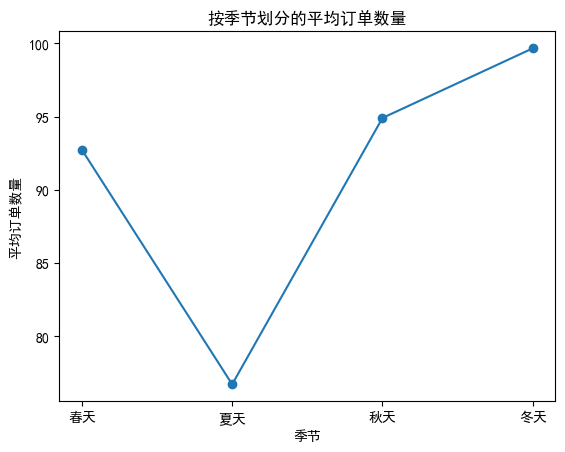

In [13]:
# 读取文件
df = pd.read_csv('order_train2.csv', encoding='gbk')
# 将订单日期转换为日期类型
df['order_date'] = pd.to_datetime(df['order_date'])
# 按照季节对订单日期进行分类
df['season'] = (df['order_date'].dt.month % 12 + 3) // 3
df['season'] = df['season'].replace({1: '冬天', 2: '春天', 3: '夏天', 4: '秋天'})
# 计算每个季节的平均需求量
mean_qty_by_season = df.groupby('season')['ord_qty'].mean()
# 按照春夏秋冬的顺序重新排序
mean_qty_by_season = mean_qty_by_season.reindex(['春天', '夏天', '秋天', '冬天'])
# 绘制折线图
plt.plot(mean_qty_by_season.index, mean_qty_by_season.values, marker='o')
# 设置图形标题和坐标轴标签
plt.title('按季节划分的平均订单数量')
plt.xlabel('季节')
plt.ylabel('平均订单数量')
# 显示图形
plt.show()

In [14]:
mean_qty_by_season

season
春天    92.737527
夏天    76.725537
秋天    94.908732
冬天    99.665260
Name: ord_qty, dtype: float64

2015
season
春天           NaN
夏天           NaN
秋天    114.909689
冬天    118.535765
Name: ord_qty, dtype: float64
2016
season
春天     92.067565
夏天     83.309322
秋天    102.148889
冬天    103.928584
Name: ord_qty, dtype: float64
2017
season
春天     92.220717
夏天     85.745248
秋天    114.434934
冬天    102.538224
Name: ord_qty, dtype: float64
2018
season
春天    93.795292
夏天    63.301960
秋天    71.526668
冬天    89.186793
Name: ord_qty, dtype: float64


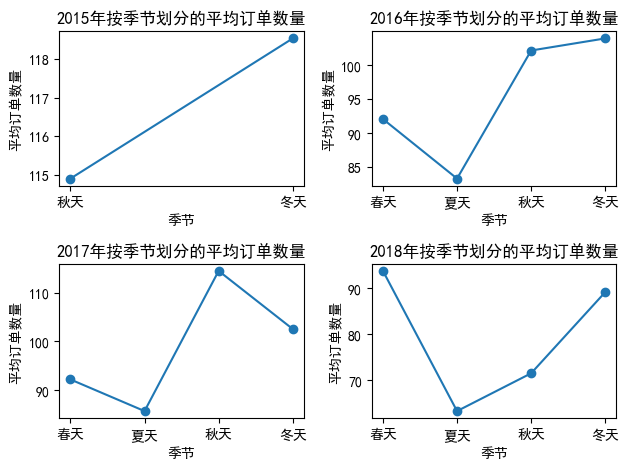

In [15]:
# 各年份季节与销量关系 8_2
# 按照季节对订单日期进行分类
df['season'] = (df['order_date'].dt.month % 12 + 3) // 3
df['season'] = df['season'].replace({1: '冬天', 2: '春天', 3: '夏天', 4: '秋天'})


# 遍历每个年份，绘制对应的子图
for year in range(2015, 2019):
    # 选择当前年份的数据
    df_year = df[df['order_date'].dt.year == year]

    # 计算每个季节的平均需求量
    mean_qty_by_season = df_year.groupby('season')['ord_qty'].mean()
    # 按照春夏秋冬的顺序重新排序
    mean_qty_by_season = mean_qty_by_season.reindex(['春天', '夏天', '秋天', '冬天'])
    print(year,mean_qty_by_season,sep='\n')
    # 绘制子图
    plt.subplot(2, 2, year - 2014)
    plt.plot(mean_qty_by_season.index, mean_qty_by_season.values, marker='o')
    plt.title('{}年按季节划分的平均订单数量'.format(year))
    plt.xlabel('季节')
    plt.ylabel('平均订单数量')

# 调整子图之间的距离和布局
plt.tight_layout()

# 显示图形
plt.show()

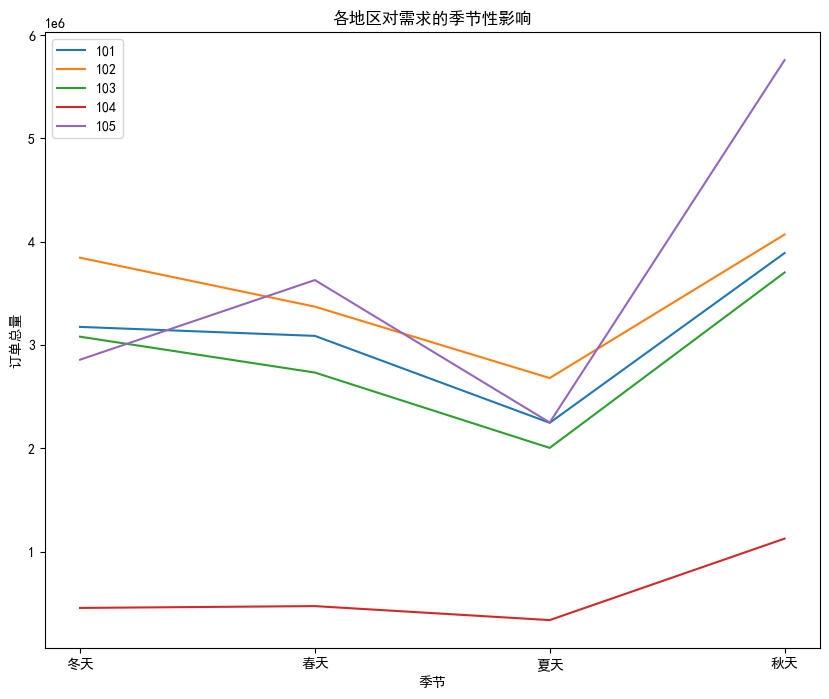

In [20]:
# 各地区对需求的季节性影响 8_3
# 提取季节信息
df['season'] = (df['order_date'].dt.month%12 + 3)//3
# 按照区域、季节进行分组，计算销售量的总和
df_grouped = df.groupby(['sales_region_code', 'season'])['ord_qty'].sum().reset_index()
# 可视化结果
fig, ax = plt.subplots(figsize=(10, 8))

for region in df_grouped['sales_region_code'].unique():
    region_df = df_grouped[df_grouped['sales_region_code'] == region]
    ax.plot(region_df['season'], region_df['ord_qty'], label=region)

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['冬天', '春天', '夏天', '秋天'])
ax.set_xlabel('季节')
ax.set_ylabel('订单总量')
ax.set_title('各地区对需求的季节性影响')
ax.legend()
plt.show()

In [66]:
df_grouped

,sales_region_code,season,ord_qty
0,101,1,3175401
1,101,2,3088457
2,101,3,2246764
3,101,4,3890327
4,102,1,3845334
5,102,2,3371458
6,102,3,2680018
7,102,4,4069812
8,103,1,3080547
9,103,2,2733386


301-405
  category  season    ord_qty
0  301-405       1  76.281618
1  301-405       2  77.369762
2  301-405       3  61.450482
3  301-405       4  77.224947
302-408
  category  season    ord_qty
4  302-408       1  71.004339
5  302-408       2  70.221133
6  302-408       3  55.550184
7  302-408       4  65.278842
303-401
   category  season    ord_qty
8   303-401       1  56.961035
9   303-401       2  61.375434
10  303-401       3  53.400386
11  303-401       4  66.190942
303-406
   category  season   ord_qty
12  303-406       1  9.343252
13  303-406       2  8.510350
14  303-406       3  9.679054
15  303-406       4  8.775564
303-410
   category  season    ord_qty
16  303-410       1  15.734597
17  303-410       2  15.993544
18  303-410       3  16.524640
19  303-410       4  15.809201
303-411
   category  season    ord_qty
20  303-411       1   9.376238
21  303-411       2  10.755556
22  303-411       3   8.628253
23  303-411       4   8.890323
304-409
   category  season    ord_qt

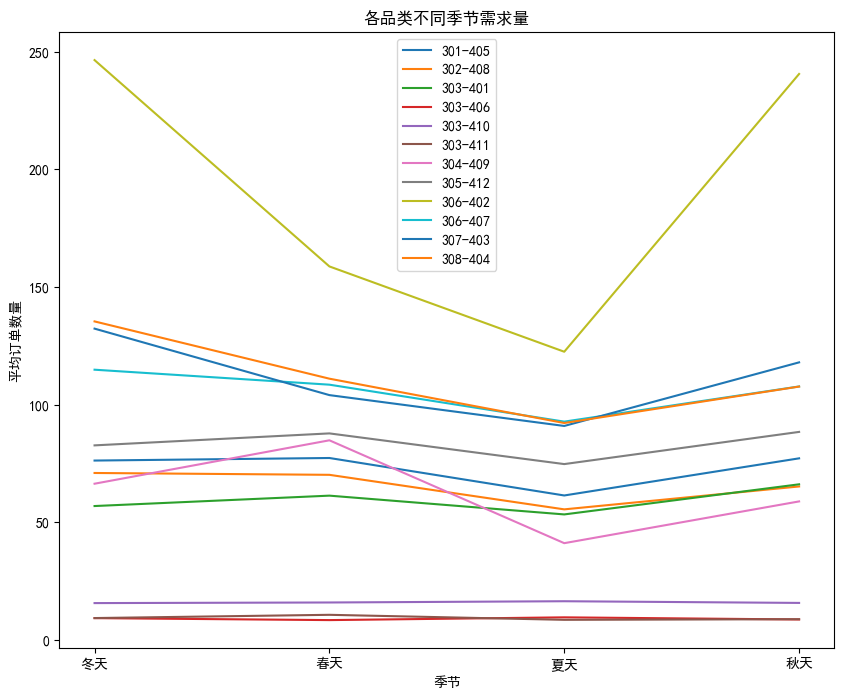

In [69]:
# 季节和品类的关系 8_4
# 合并产品大类编码和产品细类编码，得到品类
df['category'] = df['first_cate_code'].astype(str) + '-' + df['second_cate_code'].astype(str)
# 提取季节信息
df['season'] = (df['order_date'].dt.month%12 + 3)//3
# 按照品类、季节进行分组，计算销售量的平均值
df_grouped = df.groupby(['category', 'season'])['ord_qty'].mean().reset_index()
# 可视化结果
fig, ax = plt.subplots(figsize=(10, 8))

for region in df_grouped['category'].unique():
    region_df = df_grouped[df_grouped['category'] == region]
    ax.plot(region_df['season'], region_df['ord_qty'], label=region)
    print(region,region_df,sep='\n')

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['冬天', '春天', '夏天', '秋天'])
ax.set_xlabel('季节')
ax.set_ylabel('平均订单数量')
ax.set_title('各品类不同季节需求量')
ax.legend()
plt.show()